In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
from pprint import pprint
import numpy as np
import pandas as pd
from datetime import datetime

from utils.dataloader import gen_dataloader
from utils.model_manager import Manager
from models.cnn import LW60, MNIST
from config.config import TransformParam, ConfDataloader

## dataloader

In [2]:
IMG_DIR_BASE = "./mnist_data/imgs/"
list_dir = [IMG_DIR_BASE + str(i) + "/" for i in range(10)]
list_label = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

class_num = 2
list_dir = list_dir[:class_num]
list_label = list_label[:class_num]

dataloader, data_descriptions = gen_dataloader(
    data_dirs=list_dir, 
    labels=list_label, 
    test_size=0.2)

print(dataloader.dataset.label_idx_dict)
pprint(data_descriptions)

{'one': 0, 'zero': 1}
{'class': {'one', 'zero'},
 'class_num': 2,
 'data_num': {'test': {'one': 226, 'zero': 200},
              'train': {'one': 901, 'zero': 801}}}


data index: 1/426
label_index: 0
label: one
torch.Size([1, 28, 28])


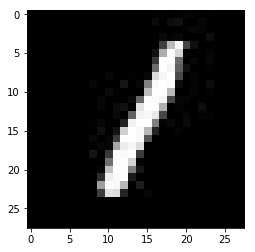

In [3]:
index = 1

dataloader.set_mode(mode="test")
x, y = dataloader.dataset.__getitem__(index=index)

print(f"data index: {index}/{dataloader.dataset.__len__()}")
print(f"label_index: {y}")
print(f"label: {dataloader.dataset.label_idx2label(label_index=y.item())}")
print(x.size())

arr_x = np.squeeze(x.numpy().transpose((1, 2, 0)))
plt.imshow(arr_x, cmap = "gray")

# model

In [4]:
model = MNIST(
    d_params={
        "dropout_feature": 0.3,
        "dropout_classifier": 0.3,
        "class_num": data_descriptions["class_num"]})

In [5]:
model.model_descriptions()

{'name': 'MNIST',
 'input_size': 28,
 'input_channel': 1,
 'params': {'dropout_feature': 0.3, 'dropout_classifier': 0.3, 'class_num': 2}}

## prepare manager and train model

In [6]:
manager = Manager(model=model)
manager.train(
    num_epochs=50, 
    dataloader=dataloader, 
    print_epoch_step=int(5),
    auto_save=True)
plt.close()

Training: MNIST 20220104185352
batch size: 4

Epoch:5/50 ============
    Mode: train, Loss: 0.6834, Acc: 0.5294
    Mode: test, Loss: 0.676, Acc: 0.5258
Epoch:10/50 ============
    Mode: train, Loss: 0.0696, Acc: 0.9853
    Mode: test, Loss: 0.0271, Acc: 0.9906
Epoch:15/50 ============
    Mode: train, Loss: 0.0123, Acc: 0.9965
    Mode: test, Loss: 0.0088, Acc: 0.993
Epoch:20/50 ============
    Mode: train, Loss: 0.0093, Acc: 0.9953
    Mode: test, Loss: 0.0052, Acc: 0.993
Epoch:25/50 ============
    Mode: train, Loss: 0.0062, Acc: 0.9971
    Mode: test, Loss: 0.0048, Acc: 0.993
Epoch:30/50 ============
    Mode: train, Loss: 0.0043, Acc: 0.9976
    Mode: test, Loss: 0.0028, Acc: 0.9953
Epoch:35/50 ============
    Mode: train, Loss: 0.0057, Acc: 0.9982
    Mode: test, Loss: 0.0045, Acc: 0.993
Epoch:40/50 ============
    Mode: train, Loss: 0.0039, Acc: 0.9982
    Mode: test, Loss: 0.0032, Acc: 0.993
Epoch:45/50 ============
    Mode: train, Loss: 0.005, Acc: 0.9971
    Mode: test

c:\users\arimu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


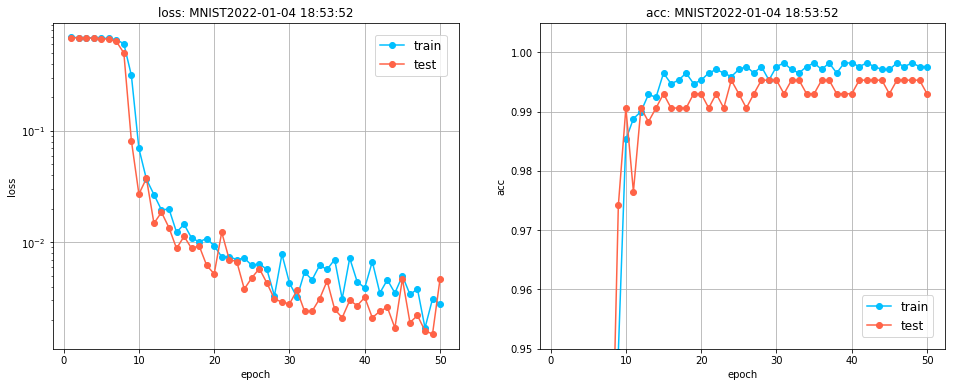

In [7]:
result_fig = manager.make_result_fig()
result_fig.show()

## save and load model info data

In [8]:
save_dir = "MNIST_test/"
SAVE_FILE_NAME = "MNIST_test"
manager.save_model_info(dir=save_dir, fname=SAVE_FILE_NAME)

In [9]:
next_manager = Manager(model=MNIST(model_info_fname=save_dir + SAVE_FILE_NAME))

## prediction

In [10]:
for index in range(10):
    dataloader.set_mode(mode="test")
    fn, label = dataloader.dataset.get_filename_label(index=index)
    pred = next_manager.predict(fpath=fn)
    print(f"index: {index}, label: {label}, prediction: {pred}")

index: 0, label: zero, prediction: zero
index: 1, label: one, prediction: one
index: 2, label: zero, prediction: zero
index: 3, label: zero, prediction: zero
index: 4, label: zero, prediction: zero
index: 5, label: zero, prediction: zero
index: 6, label: one, prediction: one
index: 7, label: one, prediction: one
index: 8, label: one, prediction: one
index: 9, label: zero, prediction: zero
